In [7]:
# !pip install mljar-supervised==0.10.2

In [51]:
import pandas as pd

pd.options.display.max_rows = 20
pd.options.display.max_columns = 50
pd.options.display.precision = 2

df = pd.read_csv('google_analytics_clean_data.csv')
df["date"] = pd.to_datetime(df["date"], format="%Y%m%d") # seting the column as pandas datetime
df

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.operatingSystem,device.isMobile,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.networkDomain,totals.visits,totals.hits,totals.pageviews,totals.bounces,totals.newVisits,totals.transactionRevenue,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.isTrueDirect,trafficSource.referralPath
0,Organic Search,2016-09-02,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,Android,True,mobile,Europe,Northern Europe,United Kingdom,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,1,1,1.0,1.0,NaN,NaN,(not set),google,organic,(not provided),True,NaN
1,Organic Search,2016-09-02,982320996976275749,982320996976275749_1472849434,Not Socially Engaged,1472849434,1,1472849434,Safari,Macintosh,False,desktop,Europe,Western Europe,France,not available in demo dataset,not available in demo dataset,not available in demo dataset,wanadoo.fr,1,1,1.0,1.0,1.0,NaN,(not set),google,organic,(not provided),NaN,NaN
2,Organic Search,2016-09-02,9876750586615598787,9876750586615598787_1472801099,Not Socially Engaged,1472801099,1,1472801099,Chrome,Windows,False,desktop,Europe,Western Europe,Netherlands,not available in demo dataset,not available in demo dataset,not available in demo dataset,igmholding.nl,1,1,1.0,1.0,1.0,NaN,(not set),google,organic,(not provided),NaN,NaN
3,Organic Search,2016-09-02,3982295596181714479,3982295596181714479_1472825889,Not Socially Engaged,1472825889,1,1472825889,Chrome,Macintosh,False,desktop,Asia,Eastern Asia,Taiwan,not available in demo dataset,not available in demo dataset,not available in demo dataset,hinet.net,1,1,1.0,1.0,1.0,NaN,(not set),google,organic,(not provided),NaN,NaN
4,Organic Search,2016-09-02,715569826025005549,0715569826025005549_1472864193,Not Socially Engaged,1472864193,1,1472864193,Chrome,Windows,False,desktop,Americas,South America,Chile,Santiago Metropolitan Region,(not set),Santiago,movistar.cl,1,1,1.0,1.0,1.0,NaN,(not set),google,organic,(not provided),NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282973,Social,2017-01-04,3591531861629139100,3591531861629139100_1483534920,Not Socially Engaged,1483534920,1,1483534920,Chrome,Macintosh,False,desktop,Europe,Northern Europe,Sweden,Stockholm County,(not set),Stockholm,dgcsystems.net,1,5,5.0,NaN,1.0,NaN,(not set),quora.com,referral,NaN,NaN,/Where-can-I-buy-a-stuffed-Go-language-gopher-...
282974,Social,2017-01-04,168043908052904808,168043908052904808_1483541485,Not Socially Engaged,1483541485,1,1483541485,Chrome,Windows,False,desktop,Europe,Southern Europe,Italy,not available in demo dataset,not available in demo dataset,not available in demo dataset,electrosystem.com,1,7,7.0,NaN,1.0,NaN,(not set),quora.com,referral,NaN,NaN,/Where-can-I-buy-a-stuffed-Go-language-gopher-...
282975,Social,2017-01-04,256641390199759052,256641390199759052_1483556333,Not Socially Engaged,1483556333,1,1483556333,Chrome,iOS,True,tablet,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,rr.com,1,11,7.0,NaN,1.0,NaN,(not set),m.youtube.com,referral,NaN,NaN,/watch
282976,Social,2017-01-04,2709355455991750775,2709355455991750775_1483592857,Not Socially Engaged,1483592857,1,1483592864,Chrome,Windows,False,desktop,Asia,Southeast Asia,Indonesia,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,1,24,22.0,NaN,1.0,NaN,(not set),facebook.com,referral,NaN,NaN,/l.php


In [52]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.operatingSystem,device.isMobile,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.networkDomain,totals.visits,totals.hits,totals.pageviews,totals.bounces,totals.newVisits,totals.transactionRevenue,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.isTrueDirect,trafficSource.referralPath
0,Organic Search,2016-09-02,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,Android,True,mobile,Europe,Northern Europe,United Kingdom,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,1,1,1.0,1.0,NaN,NaN,(not set),google,organic,(not provided),True,NaN
1,Organic Search,2016-09-02,982320996976275749,982320996976275749_1472849434,Not Socially Engaged,1472849434,1,1472849434,Safari,Macintosh,False,desktop,Europe,Western Europe,France,not available in demo dataset,not available in demo dataset,not available in demo dataset,wanadoo.fr,1,1,1.0,1.0,1.0,NaN,(not set),google,organic,(not provided),NaN,NaN
2,Organic Search,2016-09-02,9876750586615598787,9876750586615598787_1472801099,Not Socially Engaged,1472801099,1,1472801099,Chrome,Windows,False,desktop,Europe,Western Europe,Netherlands,not available in demo dataset,not available in demo dataset,not available in demo dataset,igmholding.nl,1,1,1.0,1.0,1.0,NaN,(not set),google,organic,(not provided),NaN,NaN
3,Organic Search,2016-09-02,3982295596181714479,3982295596181714479_1472825889,Not Socially Engaged,1472825889,1,1472825889,Chrome,Macintosh,False,desktop,Asia,Eastern Asia,Taiwan,not available in demo dataset,not available in demo dataset,not available in demo dataset,hinet.net,1,1,1.0,1.0,1.0,NaN,(not set),google,organic,(not provided),NaN,NaN
4,Organic Search,2016-09-02,715569826025005549,0715569826025005549_1472864193,Not Socially Engaged,1472864193,1,1472864193,Chrome,Windows,False,desktop,Americas,South America,Chile,Santiago Metropolitan Region,(not set),Santiago,movistar.cl,1,1,1.0,1.0,1.0,NaN,(not set),google,organic,(not provided),NaN,NaN


In [53]:
df.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId',
       'socialEngagementType', 'visitId', 'visitNumber', 'visitStartTime',
       'device.browser', 'device.operatingSystem', 'device.isMobile',
       'device.deviceCategory', 'geoNetwork.continent',
       'geoNetwork.subContinent', 'geoNetwork.country', 'geoNetwork.region',
       'geoNetwork.metro', 'geoNetwork.city', 'geoNetwork.networkDomain',
       'totals.visits', 'totals.hits', 'totals.pageviews', 'totals.bounces',
       'totals.newVisits', 'totals.transactionRevenue',
       'trafficSource.campaign', 'trafficSource.source',
       'trafficSource.medium', 'trafficSource.keyword',
       'trafficSource.isTrueDirect', 'trafficSource.referralPath'],
      dtype='object')

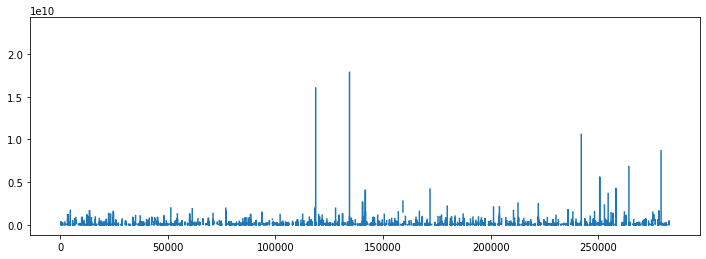

In [54]:
df['totals.transactionRevenue'].plot(figsize=(12,4))

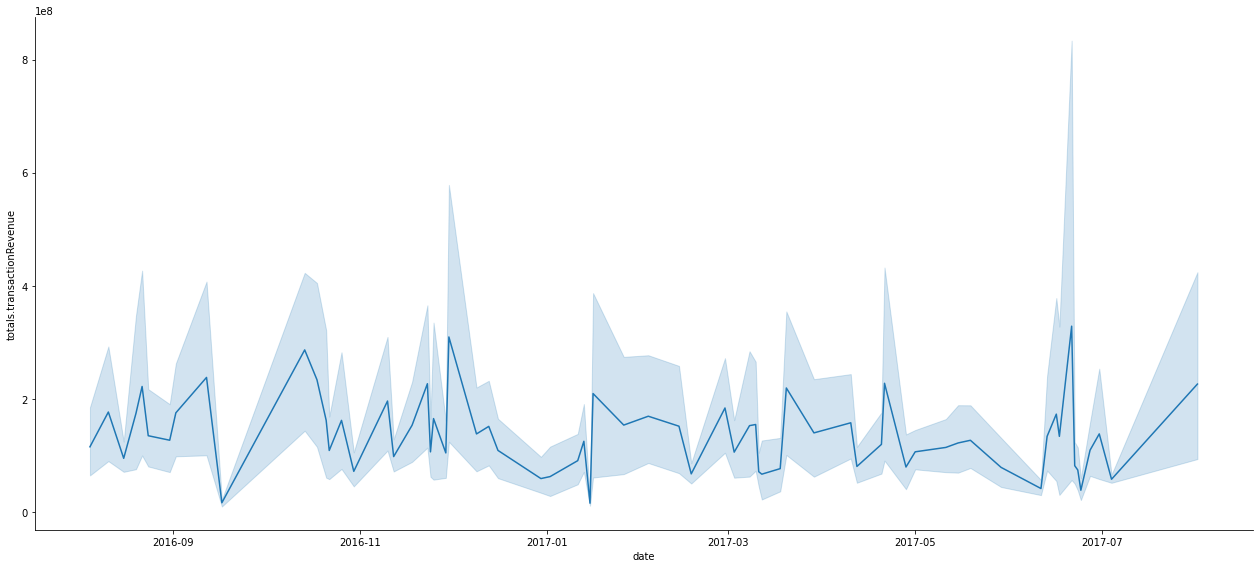

In [12]:
import seaborn as sns

sns.relplot(x='date', y='totals.transactionRevenue', data=df,kind='line',height=8, aspect=2.2)

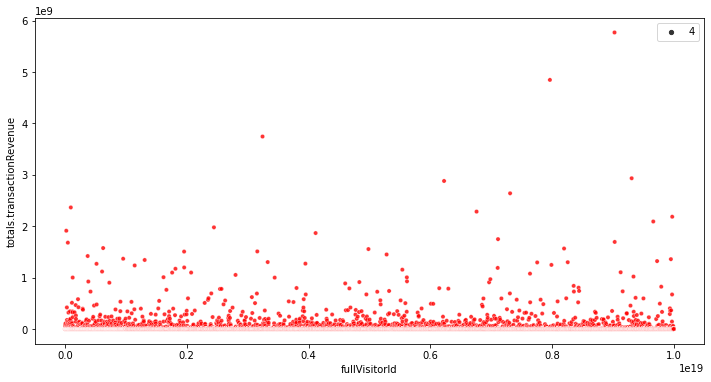

In [13]:
import matplotlib.pyplot as plt # visualization

data = df.groupby("fullVisitorId")["totals.transactionRevenue"].sum().reset_index()
f, ax = plt.subplots(figsize=(12, 6))
fig =sns.scatterplot(x='fullVisitorId', y='totals.transactionRevenue',size=4,alpha=.8,color='red', data=data)

In [14]:
zero_revenue_users = (data["totals.transactionRevenue"]==0).sum()
print("Number of unique customers with non-zero revenue : ", len(data)-zero_revenue_users, "and the ratio is : ", zero_revenue_users / len(data))

Number of unique customers with non-zero revenue :  1559 and the ratio is :  0.9528903393466897


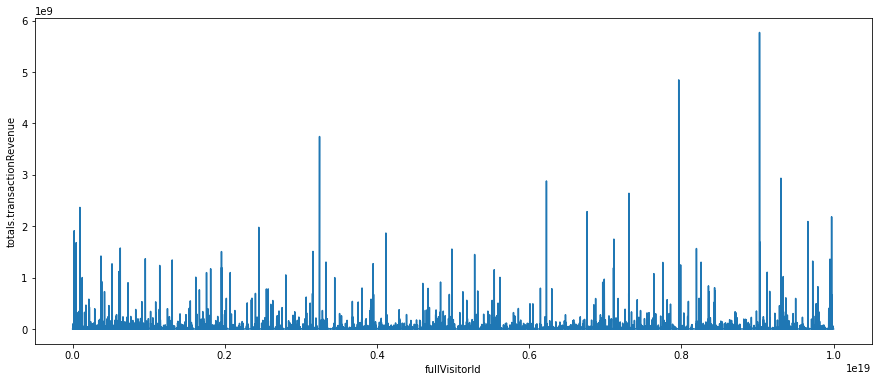

In [18]:
data = df.groupby("fullVisitorId")["totals.transactionRevenue"].sum().reset_index()
f, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x='fullVisitorId', y='totals.transactionRevenue', data=data)

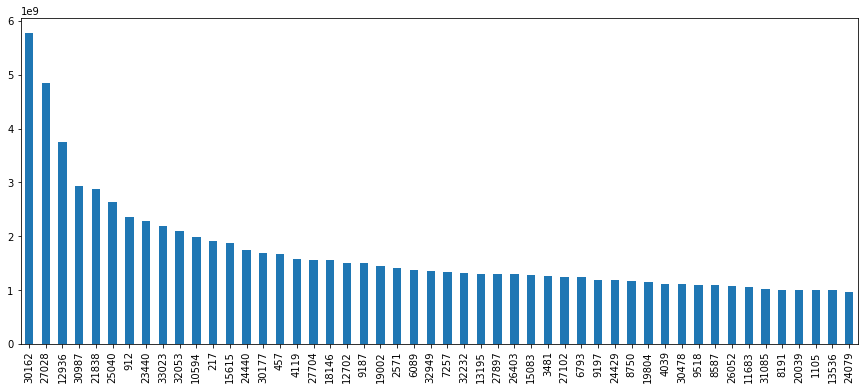

In [19]:
top_50_customers = data.sort_values(['totals.transactionRevenue'],ascending=False).head(50)
top_50_customers['totals.transactionRevenue'].plot.bar(figsize=(15,6))

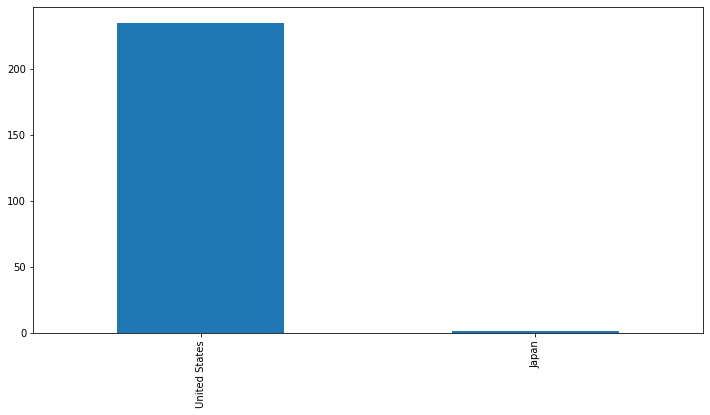

In [20]:
top_50_data = df[df.fullVisitorId.isin(top_50_customers.fullVisitorId)]
top_50_countries = top_50_data['geoNetwork.country'].value_counts()
top_50_countries.plot.bar(figsize=(12,6))

In [21]:
top_50_countries

United States    235
Japan              2
Name: geoNetwork.country, dtype: int64

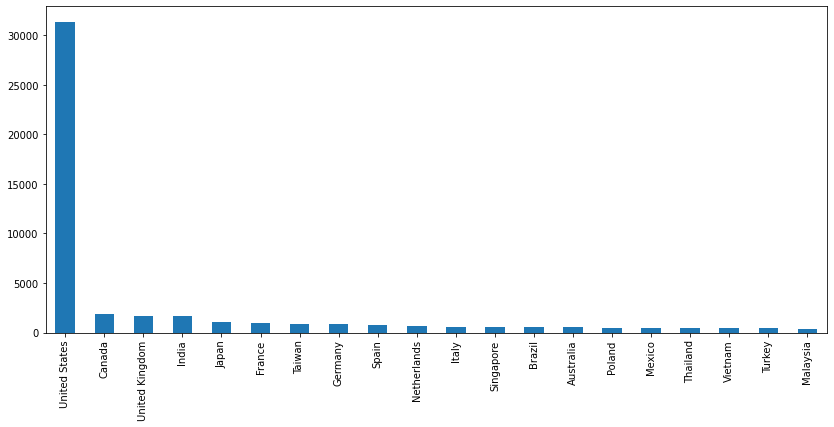

In [22]:
global_countries = df['geoNetwork.country'].value_counts().head(20)
global_countries.plot.bar(figsize=(14,6))

In [23]:
global_countries

United States     31339
Canada             1874
United Kingdom     1696
India              1684
Japan              1061
France              962
Taiwan              909
Germany             850
Spain               723
Netherlands         657
Italy               609
Singapore           590
Brazil              589
Australia           536
Poland              474
Mexico              469
Thailand            466
Vietnam             458
Turkey              413
Malaysia            376
Name: geoNetwork.country, dtype: int64

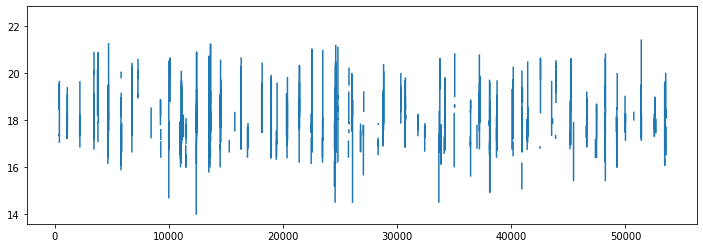

In [24]:
import numpy as np

df['totals.transactionRevenue'] = np.log(df['totals.transactionRevenue'])
df['totals.transactionRevenue'].plot(figsize=(12,4))

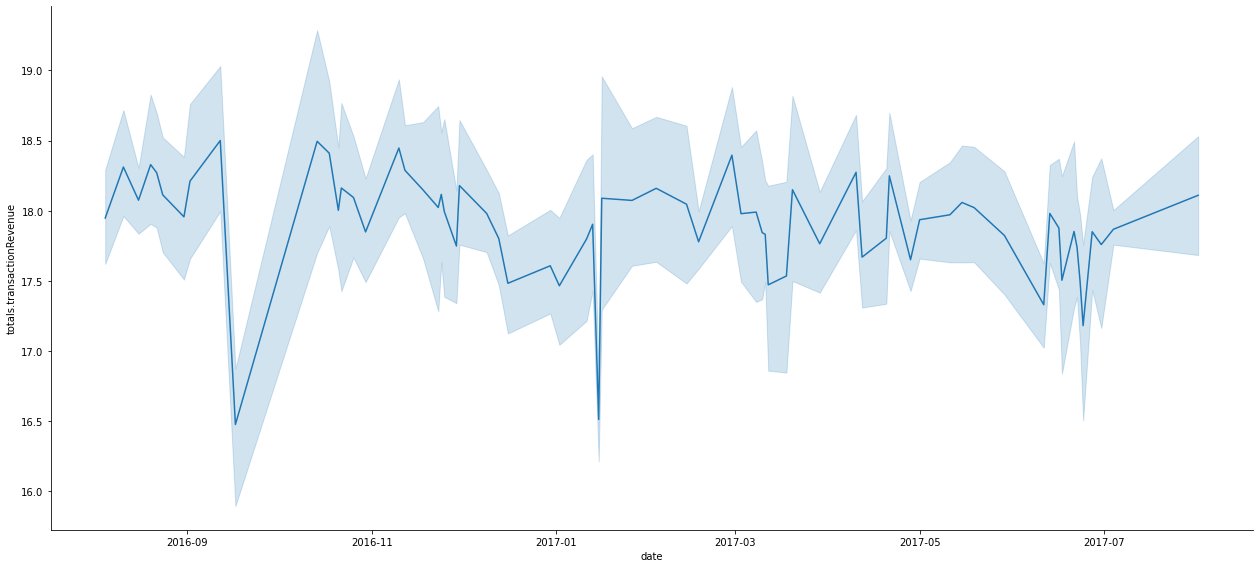

In [25]:
sns.relplot(x='date', y='totals.transactionRevenue', data=df,kind='line',height=8, aspect=2.2)

In [26]:
# * The 80/20 rule has proven true for many businesses–only a small percentage of customers produce most of the revenue. 
# As such, marketing teams are challenged to make appropriate investments in promotional strategies.

In [27]:
const_cols = [c for c in df.columns if df[c].nunique(dropna=False)==1 ]
const_cols

[]

In [28]:
df = df.drop(const_cols, axis=1)

In [29]:
drop_cols = ['sessionId','visitId','visitStartTime','geoNetwork.continent','geoNetwork.subContinent',
             'geoNetwork.region','geoNetwork.metro','geoNetwork.city','geoNetwork.networkDomain']
df = df.drop(drop_cols, axis=1)

In [30]:
df.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'socialEngagementType',
       'visitNumber', 'device.browser', 'device.operatingSystem',
       'device.isMobile', 'device.deviceCategory', 'geoNetwork.country',
       'totals.visits', 'totals.hits', 'totals.pageviews', 'totals.bounces',
       'totals.newVisits', 'totals.transactionRevenue',
       'trafficSource.campaign', 'trafficSource.source',
       'trafficSource.medium', 'trafficSource.keyword',
       'trafficSource.isTrueDirect', 'trafficSource.referralPath'],
      dtype='object')

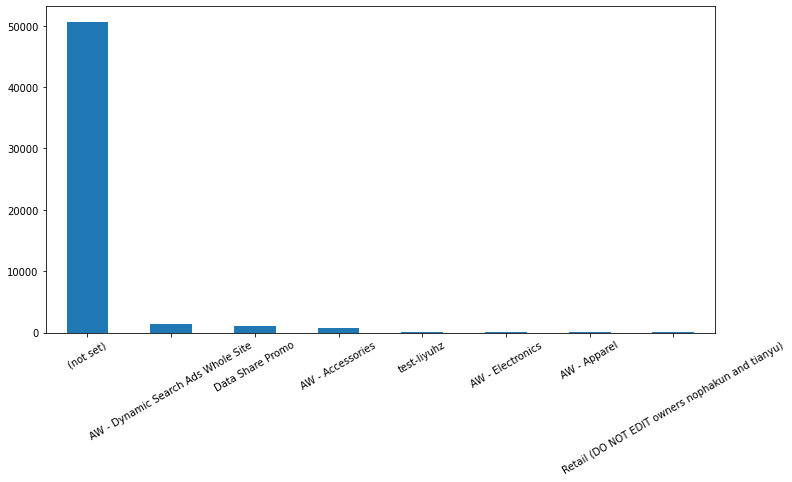

In [31]:
df['trafficSource.campaign'].value_counts().plot.bar(figsize=(12,6),rot=30)

In [32]:
df.head()

,channelGrouping,date,fullVisitorId,socialEngagementType,visitNumber,device.browser,device.operatingSystem,device.isMobile,device.deviceCategory,geoNetwork.country,totals.visits,totals.hits,totals.pageviews,totals.bounces,totals.newVisits,totals.transactionRevenue,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.isTrueDirect,trafficSource.referralPath
0,Organic Search,2016-09-02,27294437909732085,Not Socially Engaged,2.0,Chrome,Android,True,mobile,United Kingdom,1.0,1.0,1.0,1.0,NaN,NaN,(not set),google,organic,(not provided),True,NaN
1,Organic Search,2016-09-02,982320996976275749,Not Socially Engaged,1.0,Safari,Macintosh,False,desktop,France,1.0,1.0,1.0,1.0,1.0,NaN,(not set),google,organic,(not provided),NaN,NaN
2,Organic Search,2016-09-02,9876750586615598787,Not Socially Engaged,1.0,Chrome,Windows,False,desktop,Netherlands,1.0,1.0,1.0,1.0,1.0,NaN,(not set),google,organic,(not provided),NaN,NaN
3,Organic Search,2016-09-02,3982295596181714479,Not Socially Engaged,1.0,Chrome,Macintosh,False,desktop,Taiwan,1.0,1.0,1.0,1.0,1.0,NaN,(not set),google,organic,(not provided),NaN,NaN
4,Organic Search,2016-09-02,715569826025005549,Not Socially Engaged,1.0,Chrome,Windows,False,desktop,Chile,1.0,1.0,1.0,1.0,1.0,NaN,(not set),google,organic,(not provided),NaN,NaN


In [33]:
df.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'socialEngagementType',
       'visitNumber', 'device.browser', 'device.operatingSystem',
       'device.isMobile', 'device.deviceCategory', 'geoNetwork.country',
       'totals.visits', 'totals.hits', 'totals.pageviews', 'totals.bounces',
       'totals.newVisits', 'totals.transactionRevenue',
       'trafficSource.campaign', 'trafficSource.source',
       'trafficSource.medium', 'trafficSource.keyword',
       'trafficSource.isTrueDirect', 'trafficSource.referralPath'],
      dtype='object')

In [34]:
"""
1) Slice the data in chunks of 3 months
2) Sum the revenue for each customer in the last 3 months
3) Generate columns like days since last buy, avg nr days between buys,
"""

'\n1) Slice the data in chunks of 3 months\n2) Sum the revenue for each customer in the last 3 months\n3) Generate columns like days since last buy, avg nr days between buys,\n'

In [35]:
def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return (x.max() - x.min()).days

def avg_frequency(x):
    return (x.max() - x.min()).days/x.count()


clv_freq = '3M'

groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
purchase_duration.__name__ = 'purchase_duration'
avg_frequency.__name__ = 'purchase_frequency'

In [36]:
summary_df = df.reset_index().groupby('fullVisitorId').agg({
    'totals.transactionRevenue': [min, max, sum, groupby_mean, groupby_count],
    'date': [min, max, purchase_duration, avg_frequency]
})
summary_df.columns = ['_'.join(col).lower() for col in summary_df.columns]

In [37]:
summary_df.head()

,totals.transactionrevenue_min,totals.transactionrevenue_max,totals.transactionrevenue_sum,totals.transactionrevenue_avg,totals.transactionrevenue_count,date_min,date_max,date_purchase_duration,date_purchase_frequency
fullVisitorId,,,,,,,,,
166465265517759,NaN,NaN,0.0,NaN,0,2016-08-22,2016-08-22,0,0.0
170187170673177,NaN,NaN,0.0,NaN,0,2017-06-30,2017-06-30,0,0.0
172669099830004,NaN,NaN,0.0,NaN,0,2017-06-24,2017-06-24,0,0.0
174067426171406,NaN,NaN,0.0,NaN,0,2016-11-10,2016-11-10,0,0.0
435324061339869,NaN,NaN,0.0,NaN,0,2016-10-30,2016-10-30,0,0.0


In [38]:
summary_df.shape

(33093, 9)

In [39]:
summary_df.describe()

,totals.transactionrevenue_min,totals.transactionrevenue_max,totals.transactionrevenue_sum,totals.transactionrevenue_avg,totals.transactionrevenue_count,date_purchase_duration,date_purchase_frequency
count,1559.00,1559.00,33093.00,1559.00,33093.00,33093.00,33093.00
mean,17.87,17.93,0.91,17.90,0.05,5.82,2.09
std,1.17,1.20,4.42,1.17,0.24,24.64,8.80
min,14.00,14.00,0.00,14.00,0.00,0.00,0.00
25%,17.11,17.12,0.00,17.12,0.00,0.00,0.00
50%,17.80,17.84,0.00,17.84,0.00,0.00,0.00
75%,18.53,18.59,0.00,18.57,0.00,0.00,0.00
max,22.30,22.43,160.25,22.30,9.00,361.00,155.50


In [40]:
summary_df = summary_df.loc[summary_df['date_purchase_duration'] > 0]

In [41]:
summary_df.shape

(5765, 9)

In [42]:
summary_df.head()

,totals.transactionrevenue_min,totals.transactionrevenue_max,totals.transactionrevenue_sum,totals.transactionrevenue_avg,totals.transactionrevenue_count,date_min,date_max,date_purchase_duration,date_purchase_frequency
fullVisitorId,,,,,,,,,
702913088027926,NaN,NaN,0.0,NaN,0,2017-03-18,2017-03-20,2,0.5
937838020298941,NaN,NaN,0.0,NaN,0,2016-10-21,2016-12-13,53,26.5
1237198903748058,NaN,NaN,0.0,NaN,0,2016-08-05,2016-08-11,6,3.0
1285462512259769,NaN,NaN,0.0,NaN,0,2017-06-30,2017-07-04,4,2.0
2039805699643561,NaN,NaN,0.0,NaN,0,2016-10-26,2016-11-30,35,7.0


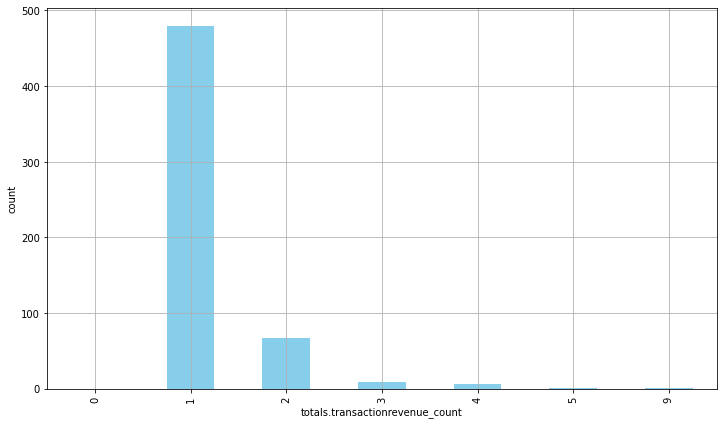

In [43]:
import matplotlib.pyplot as plt

ax = summary_df.groupby('totals.transactionrevenue_count').count()['totals.transactionrevenue_avg'][:20].plot(
    kind='bar', 
    color='skyblue',
    figsize=(12,7), 
    grid=True
)

ax.set_ylabel('count')

plt.show()

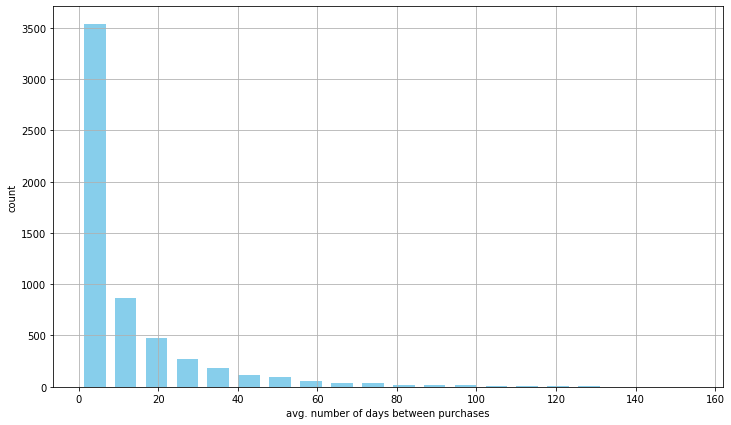

In [44]:
ax = summary_df['date_purchase_frequency'].hist(
    bins=20,
    color='skyblue',
    rwidth=0.7,
    figsize=(12,7)
)

ax.set_xlabel('avg. number of days between purchases')
ax.set_ylabel('count')

plt.show()

In [45]:
from sklearn import model_selection, preprocessing, metrics
import lightgbm as lgb

# Impute 0 for missing target values
df["totals.transactionRevenue"].fillna(0, inplace=True)
y = df["totals.transactionRevenue"].values
id = df["fullVisitorId"].values


cat_cols = ['channelGrouping','device.browser','device.deviceCategory',
            'device.operatingSystem','geoNetwork.country','trafficSource.campaign',
            'trafficSource.keyword','trafficSource.medium','trafficSource.referralPath',
            'trafficSource.source','trafficSource.isTrueDirect']

for col in cat_cols:
    print(col)
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(df[col].values.astype('str')))
    df[col] = lbl.transform(list(df[col].values.astype('str')))


num_cols = ['totals.hits',
            'totals.pageviews',
            'visitNumber',
            'totals.bounces',
            'totals.newVisits']

for col in num_cols:
    print(col)
    df[col] = df[col].astype(float)
    # test_df[col] = test_df[col].astype(float)

channelGrouping
device.browser
device.deviceCategory
device.operatingSystem
geoNetwork.country
trafficSource.campaign
trafficSource.keyword
trafficSource.medium
trafficSource.referralPath
trafficSource.source
trafficSource.isTrueDirect
totals.hits
totals.pageviews
visitNumber
totals.bounces
totals.newVisits


In [46]:
import datetime

# Split the train dataset into development and valid based on time 

dev_df = df[df['date']<='2017-05-31']
val_df = df[df['date']>'2017-05-31']
dev_y = np.log1p(dev_df["totals.transactionRevenue"].values)
val_y = np.log1p(val_df["totals.transactionRevenue"].values)

dev_X = dev_df[cat_cols + num_cols] 
val_X = val_df[cat_cols + num_cols] 
# test_X = test_df[cat_cols + num_cols] 

In [47]:
dev_df.shape

(45720, 22)

In [48]:
val_df.shape

(8226, 22)

In [49]:
# custom function to run light gbm model
def run_lgb(train_X, train_y, val_X, val_y):
    params = {
        "objective" : "regression",
        "metric" : "rmse", 
        "num_leaves" : 30,
        "min_child_samples" : 100,
        "learning_rate" : 0.1,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.5,
        "bagging_frequency" : 5,
        "bagging_seed" : 2018,
        "verbosity" : -1
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    model = lgb.train(params, lgtrain, 1000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=100)
    
    # pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
    pred_val_y = model.predict(val_X, num_iteration=model.best_iteration)
    return model, pred_val_y

# Training the model #
model, pred_val = run_lgb(dev_X, dev_y, val_X, val_y)

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 0.41462
Early stopping, best iteration is:
[97]	valid_0's rmse: 0.414428
